<a href="https://colab.research.google.com/github/ElenaBara21/TensorFlow/blob/main/02_neural_network_classification_in_tensorfloew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to neural network classification

**Binary classification** - 2 things - spam not spam

**Multiclass classification** - more than 2 things(one photo - sushi, one photo stake etc)

**Multilabel classification** - multiple label per sample(one article three labels - machine learning, Artificial intellegence, etc)

# Classification inputs and outputs

we know input -> Machine learning -> we know output

gets represented as a tensor
[batch_size, width, height, colour_channels]

shape = [None, 224, 224, 3]
shape = [32, 224, 224, 3]
*32 is a very common batch size

this shapes vary on your classification problem you're working on

# (typical) Archetecture of a classification model(we're going to be building lots of these)
Classification is where you try to classify something as one thing or another:
a few types:
* Binary
* Multiclass classification
* Multilabel classification


table from tensor flow or page295 below explanation


In [55]:
#1. Create a model (specified to your problem) - Input layer shape:
# tf.keras.Input(shape=224,224,3)),# same as number of features(age, sex, height, weight, smoking status)
# tf.keras.layers.Dense(100, activation="relu"),# where hidden layers problem specific generally 10 to 100 unlimited
# #above 100 means neurons per hidden layer
# tf.keras.layers.Dense(3, activation="softmax")# 3 is output layer shape 1 one class(3 for food, person or a dog photo), 1 per class in multiclass
#activation = relu - hidden activation usually RELurecltified linear unit
#loss function cross entropy(tf.keras.losses.BinaryCrossentropy in ->
#->tensorflow)
#Optimizer = SGD(stochastic gradient descent), Adam
#])

In [56]:
## Creating data to view and fit
from sklearn.datasets import make_circles

n_samples = 1000
#make 1000 examples
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [57]:
# Check out feautures
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [58]:
#Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

# Our data is difficult to understand right now ... lets visualize it!


In [59]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1": X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


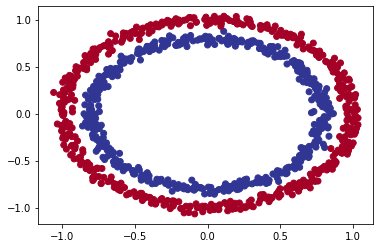

In [60]:
#Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [61]:
#Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [62]:
#How to check how many samples we're working
len(X), len(y)


(1000, 1000)

In [63]:
# View the first example of features and labels
X[0], y[0]


(array([0.75424625, 0.23148074]), 1)

## Steps in modelling with Tensor Flow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [64]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [66]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

TypeError: ignored

In [67]:
# Lets try and improve for longer

model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem our model is getting around - 50% accuracy its performing as if its guessing.

So lets step things up a notch and add an extra layer.

In [68]:
#Set the random seed 
tf.random.set_seed=42

# 1. Create the model using the Sequential API
tf.keras.layers.Dense(1),
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1),

])

#2. Compile the model 
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [69]:
#4.Evaluate the model
model_2.evaluate(X, y)


32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5000


[0.693716824054718, 0.5]

In [70]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

### Improving our model

Lets look into our bag of tricks to see how we can improve our model

1. Create a model we might more layers or increase the number of hidden units within a layer.
2. Compile a model - here we might to choose a different optimization function such as Adam or SGD
3. Fitting a model - perhaps we might fit our model for more epochs(leave it training for longer

In [71]:
#Set the random seed 
tf.random.set_seed=42

# 1. Create the model using the Sequential API

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), #add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

#2. Compile the model 
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)



In [72]:
# Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6993 - accuracy: 0.5070


[0.6993402242660522, 0.5070000290870667]

#To vizualise our model predictions lets create a function "plot decision boundary()" this functon will:
 * take in a trained model features(X) and labels(y)
 * Create a meshgrid of the different X values
 * Make predictions around the meshgrid
 * Plot the predictions as well as a line between zones (where each unique class  falls)

In [73]:
import numpy as np

In [74]:

def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np. meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
  # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


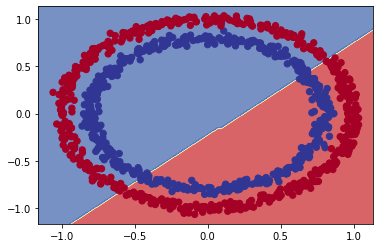

In [75]:
plot_decision_boundary(model_3, X, y)

In [76]:
# Lets see if our model can be used for a regression problem...

tf.random.set_seed=42

#Create some regression
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) #y = x + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

#Fit our model to the regression problem


In [77]:
# Set random seed
tf.random.set_seed=42
 
# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  ## Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons
 
  ## After TensorFlow 2.7.0
  tf.keras.layers.Dense(100, input_shape=(None, 1)), # <- define input_shape here
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])
 
# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

In [78]:
# Set random seed
tf.random.set_seed=42
 
# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)
 
# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]
 
# Fit our model to the data
 
## Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100) # <- this will error in TensorFlow 2.7.0+
 
## After TensorFlow 2.7.0
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), # <- expand input dimensions
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: -7048.0908 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: -7097.5752 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: -7139.6865 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: -7134.3818 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: -7141.0508 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: -7132.3750 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: -7140.0483 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: -7140.7959 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: -7137.8281 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 

NameError: ignored

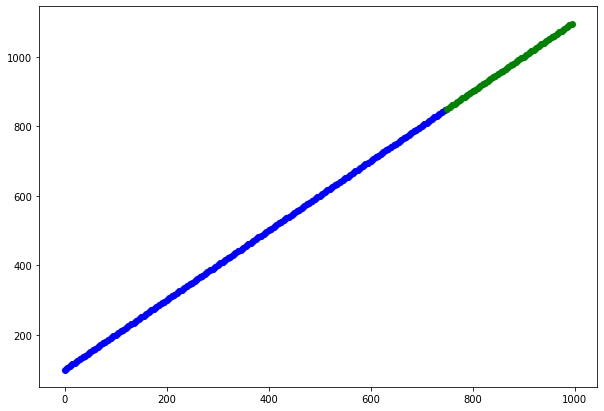

In [79]:
#Make predictions our trained model
#y_reg_preds = model_3.predict(y_reg_test)

#Plot the model's predictions agains our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend(); 


In [81]:
# Set the random seed
tf.random.set_seed=42

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # "lr" is short for "learning rate"
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 1ms/step - loss: 4.3252 - accuracy: 0.4710
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1898 - accuracy: 0.4730
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0557 - accuracy: 0.4760
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0096 - accuracy: 0.4670
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9530 - accuracy: 0.4650
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9375 - accuracy: 0.4640
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8873 - accuracy: 0.4610
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7330 - accuracy: 0.4650
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7182 - accuracy: 0.4650
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6933 - accuracy: 0.4650
Epoch 11/100
32/32 [=

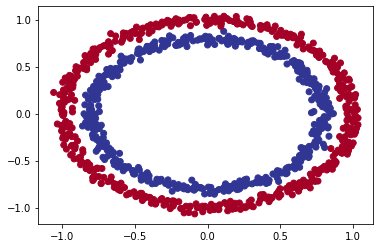

In [82]:
# check out our data
plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

doing binary classifcation...


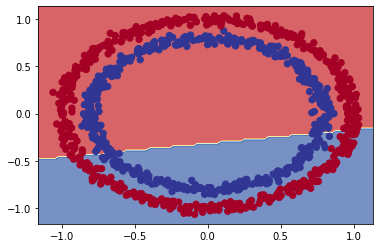

In [83]:
#Check th edecision boundary for our latest model
plot_decision_boundary(model=model_4, 
                       X=X, 
                       y=y)

Lets try our first neural network with a non-linear activation function

In [84]:
# Set  random seed
tf.random.set_seed=42

#1. Create a modela non linear
model_5=tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])
#2.Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#3.Fit the model
history = model_5.fit(X, y, epochs=100)


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 2ms/step - loss: 6.1228 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 6.1194 - accuracy: 0.4870
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 6.1175 - accuracy: 0.4870
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 6.1157 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 6.1143 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 6.0836 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9812 - accuracy: 0.4820
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9718 - accuracy: 0.4810
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9568 - accuracy: 0.4820
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9451 - accuracy: 0.4820
Epoch 11/100
32/32 [=

In [85]:
# time to replicate the multi-layer neural network from TensorFlow playgroup
tf.random.set_seed=42

#Create the model
model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(1)
])
#Compile the model
model_6.compile(loss="binary_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#Fit the model
history = model_6.fit(X, y, epochs=250)



Epoch 1/250


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/250
32/32 [=

doing binary classifcation...


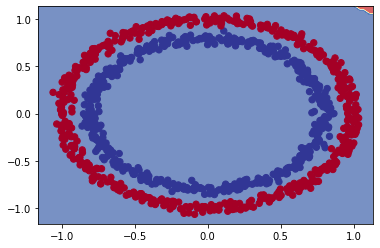

In [86]:
plot_decision_boundary(model_6, X, y)

In [87]:
# time to replicate the multi-layer neural network from TensorFlow playgroup
tf.random.set_seed=42

#Create the model
model_7 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])
#Compile the model
model_7.compile(loss="binary_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#Fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.5070
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5080
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5010
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6899 - accuracy: 0.4970
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.5050
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.4990
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5120
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5240
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5460
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5340
Epoch 11/100
32/32 [=

In [88]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.3536 - accuracy: 0.9050


[0.353631854057312, 0.9049999713897705]

doing binary classifcation...


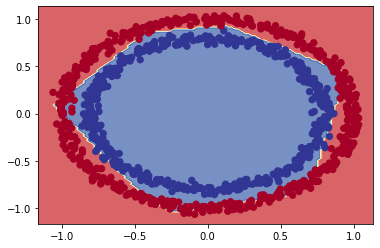

In [89]:
plot_decision_boundary(model_7, X, y)

In [90]:
#Create a toy tensor
A=tf.cast(tf.range(-10, 10), tf.float32)
A


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

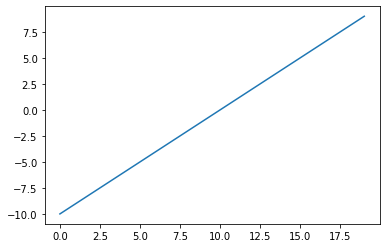

In [91]:
#Visualize our toy tensor
plt.plot(A);


In [93]:
#Lets start by replicating sigmoid(x)=1/(1+exp(-x))
def sigmoid(x):
  return 1/(1+tf.exp(-x))

#use 
sigmoid(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

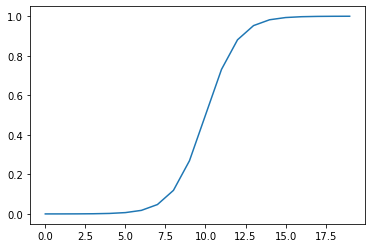

In [94]:
#plot our toy tensor
plt.plot(sigmoid(A));


In [95]:
def relu(x):
  return tf.maximum(0, x)


#Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

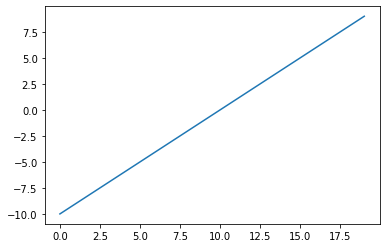

In [98]:
plt.plot(A)

In [99]:
#Lets try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>